In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True #to enable intellisense: see it when hitting tab
from sklearn.preprocessing import LabelEncoder # integer-encoding: to transform categorical variable into integer
from sklearn.preprocessing import OneHotEncoder  # OneHot-encoding
from sklearn.compose import ColumnTransformer #needed for OneHot-encoding
from sklearn.preprocessing import LabelEncoder  #needed for OneHot-encoding
from sklearn.preprocessing import StandardScaler # to scale our data
from sklearn.decomposition import PCA #PCA

In [2]:
# Set seed

random.seed(2312)

This script file is in folder "scripts", however the working directory is ML-Lab (the parent directory). Use `cd ..` to go up one level.

In [ ]:
cd ..

Check current working directory (should be based on your local directory and end with \ML-Lab)\ML-Lab\ML-Lab

In [5]:
ls

 Volume in drive D is [SSD] Documents & Education
 Volume Serial Number is C0EF-9E46

 Directory of D:\Google Drive\00_Uni Leuphana\03_3. Semester\03_ML Lab\ML-Lab

03/01/2021  00:11    <DIR>          .
03/01/2021  00:11    <DIR>          ..
31/12/2020  11:24                51 .gitignore
17/12/2020  17:11    <DIR>          .ipynb_checkpoints
03/01/2021  00:11    <DIR>          data
03/01/2021  00:11            49.043 ML_music_Lisa.ipynb
31/12/2020  10:29    <DIR>          models
09/11/2020  10:24                31 README.md
03/01/2021  00:31    <DIR>          scripts
               3 File(s)         49.125 bytes
               6 Dir(s)  90.989.060.096 bytes free


# Data prepocessing:

In [5]:
music_df = pd.read_csv("data\SpotifyFeatures.csv") 

In [10]:
#check for NA's in Dataframe:
music_df.isnull().values.any()

False

In [11]:
#search for duplicates:
search = pd.DataFrame.duplicated(music_df)
print(search[search == True])#no duplicates

Series([], dtype: bool)


In [12]:
music_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


### Variables:
- popularity: ?
- key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation (E.g.: 0 = C)
- mode: modality (major or minor) of a track (Major = 1 and Minor = 0) ? 
- time_signature:  estimated overall time signature (Taktangabe) of a track. Its a notational convention to specify how many beats are in each bar (or measure).
- title: maybe there is a way to also include strings? 
- genre: one-hot encoding
- track id: integer encoding

## Transform variables:

### 1. key:

In [13]:
music_df["key"].value_counts()

C     27583
G     26390
D     24077
C#    23201
A     22671
F     20279
B     17661
E     17390
A#    15526
F#    15222
G#    15159
D#     7566
Name: key, dtype: int64

In [14]:
## we are not using an integer encoder here because the numbers for the nodes are predetermined
# create dictionary for integer mapping:
key_mapping = {"C": 0,"G": 7,"D": 2, "C#": 1, "A": 9, "F": 5, "B": 11, "E": 4, "A#": 10, "F#": 6, "G#": 8, "D#": 3}
# map the nodes to integers:
music_df["key"] = music_df.key.map(key_mapping)
music_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,1,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,6,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,0,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,1,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,5,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


### 2. Genre:

In [15]:
music_df["genre"].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

#### Hot-encoding of variable genre: 

First way to do it: but here you need to rename the columns (ortherwise its just numbers 1,2,....)

In [16]:
# # creating instance of one-hot-encoder
# enc = OneHotEncoder(handle_unknown='ignore')
# # passing bridge-types-cat column (label encoded values of bridge_types)
# enc_df = pd.DataFrame(enc.fit_transform(music_df[['genre']]).toarray())
# # merge with main df bridge_df on key values
# music_HE_df = music_df.join(enc_df)
# music_HE_df

Second way:

In [17]:
# creating dummy dataframe
dum_df = pd.get_dummies(music_df["genre"], columns=["genre"], prefix="genre_is")
music_df = music_df.join(dum_df)
music_df = music_df.drop(["genre"],1)


In [18]:
# Removing extra dummy
music_df = music_df.drop(columns=['genre_is_A Capella'])
music_df = music_df.drop(columns=['genre_is_A Capella'])

KeyError: "['genre_is_A Capella'] not found in axis"

#### Integer-encoding of variable genre:

In [19]:
# Integer encoding of variable genre
# other option: hot encoding ( I think thats more the "right way to do it but than we add a column for each genre)
# https://towardsdatascience.com/categorical-encoding-techniques-93ebd18e1f24
# label_encoder = LabelEncoder()
# music_df['genre'] = label_encoder.fit_transform(music_df['genre'])
# music_df.head()

## 3. Mode:

In [20]:
music_df["mode"].value_counts()

Major    151744
Minor     80981
Name: mode, dtype: int64

In [21]:
music_df["mode"] = music_df["mode"].replace({"Major": 1, "Minor":0})
music_df.rename(columns={"mode" : "Mode is Major"}, inplace=True)


In [22]:
music_df["Mode is Major"].value_counts()

1    151744
0     80981
Name: Mode is Major, dtype: int64

### 4. time_signature

I will transform the string into a fraction (float) (if thats correct? -> music expert Chan what do you think?)

In [23]:
music_df["time_signature"].value_counts()

4/4    200760
3/4     24111
5/4      5238
1/4      2608
0/4         8
Name: time_signature, dtype: int64

In [24]:
# create dictionary for integer mapping:
time_signature_mapping = {"4/4": 1,"3/4": 3/4,"5/4": 5/4, "1/4": 1/4, "0/4": 0}
# map the nodes to integers:
music_df["time_signature"] = music_df.time_signature.map(time_signature_mapping)
music_df["time_signature"].value_counts()

1.00    200760
0.75     24111
1.25      5238
0.25      2608
0.00         8
Name: time_signature, dtype: int64

In [25]:
# fixing wrong encoding
music_df.time_signature.replace((1,0.75,1.25,0.25,0), ('4/4','3/4','5/4','1/4','0/4'), inplace=True)
music_df['time_signature'] = music_df['time_signature'].astype(object)
dum_df = pd.get_dummies(music_df["time_signature"], columns=["time_signature"], prefix="time_sig_is")
music_df = music_df.join(dum_df)
music_df = music_df.drop(["time_signature"],1)

# removing the extra dummy to avoid the dummy variable trap
music_df = music_df.drop(columns=['time_sig_is_0/4'])

## Drop all columns we are not using (string valued):

I am also removing track id because I think we dont need it right now 

In [26]:
music_df = music_df.drop(["artist_name","track_name", "track_id"],1)


## Export Encoded Data

In [27]:
pd.DataFrame.to_csv(music_df, "data/EncodedData.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/EncodedData.csv'

# Data Analysis

## 1. First Overview 

In [28]:
print(music_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   popularity                 232725 non-null  int64  
 1   acousticness               232725 non-null  float64
 2   danceability               232725 non-null  float64
 3   duration_ms                232725 non-null  int64  
 4   energy                     232725 non-null  float64
 5   instrumentalness           232725 non-null  float64
 6   key                        232725 non-null  int64  
 7   liveness                   232725 non-null  float64
 8   loudness                   232725 non-null  float64
 9   Mode is Major              232725 non-null  int64  
 10  speechiness                232725 non-null  float64
 11  tempo                      232725 non-null  float64
 12  valence                    232725 non-null  float64
 13  genre_is_Alternative       23

## 2. Plots

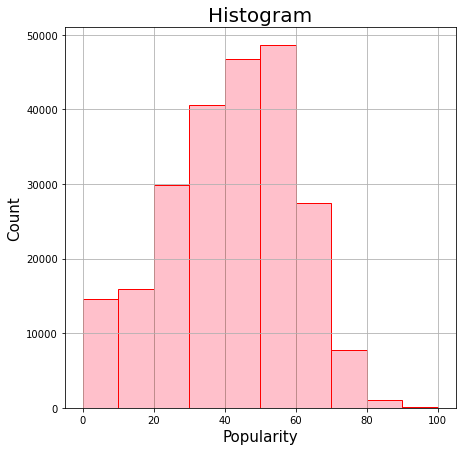

In [21]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Popularity', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Histogram', fontsize = 20)
plt.hist(music_df["popularity"], facecolor = "pink", edgecolor = "r")
ax.grid()

## 3. Correlation:

In [22]:
pd.DataFrame.corr(music_df)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,Mode is Major,...,genre_is_Pop,genre_is_R&B,genre_is_Rap,genre_is_Reggae,genre_is_Reggaeton,genre_is_Rock,genre_is_Ska,genre_is_Soul,genre_is_Soundtrack,genre_is_World
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,0.012190,-0.167995,0.363011,-0.070550,...,0.286972,0.123231,0.216834,-0.060253,-0.037162,0.207083,-0.136989,0.065393,-0.081997,-0.062128
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,-0.026297,0.069004,-0.690202,0.055907,...,-0.083061,-0.045402,-0.114853,-0.101959,-0.084240,-0.098835,-0.150875,-0.004479,0.204438,0.014087
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,0.030046,-0.041684,0.438668,-0.061890,...,0.094844,0.094790,0.156455,0.154503,0.190347,-0.017639,-0.029570,0.068732,-0.323495,-0.120689
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.003795,0.023783,-0.047618,-0.011555,...,-0.024585,-0.015801,-0.026092,0.007290,-0.005181,0.003221,-0.072945,-0.000692,-0.074324,0.136005
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.032128,0.192801,0.816088,-0.041302,...,0.055442,-0.005106,0.061378,0.048670,0.134847,0.087148,0.184875,-0.029424,-0.276132,-0.049380
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.017168,-0.134198,-0.506320,-0.049823,...,-0.089175,-0.081274,-0.093298,-0.070808,-0.095409,-0.063925,-0.060232,-0.057268,0.436335,0.057007
key,0.012190,-0.026297,0.030046,0.003795,0.032128,-0.017168,1.000000,0.002685,0.026300,-0.142132,...,-0.001469,0.006866,-0.000699,0.020390,0.019678,-0.003730,0.001714,0.008499,-0.020012,0.001234
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,0.002685,1.000000,0.045686,0.018459,...,-0.036232,-0.040100,-0.016474,-0.021892,-0.007554,-0.028796,0.028583,-0.036357,-0.081233,0.013004
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.026300,0.045686,1.000000,-0.027109,...,0.105077,0.065937,0.098263,0.067695,0.122996,0.077566,0.112766,0.023644,-0.336720,-0.038181
Mode is Major,-0.070550,0.055907,-0.061890,-0.011555,-0.041302,-0.049823,-0.142132,0.018459,-0.027109,1.000000,...,-0.012700,-0.053362,-0.039265,-0.030646,-0.058932,0.038391,0.037395,-0.038152,-0.042791,0.041527


## 4. PCA

Standardize the Data:

In [23]:
music_df_scaled = music_df.copy()
#make list of all column names
col_names = list(music_df.columns.values)

features = music_df_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
music_df_scaled[col_names] = features
music_df_scaled.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,Mode is Major,...,genre_is_Pop,genre_is_R&B,genre_is_Rap,genre_is_Reggae,genre_is_Reggaeton,genre_is_Rock,genre_is_Ska,genre_is_Soul,genre_is_Soundtrack,genre_is_World
0,-2.261007,0.683376,-0.890935,-1.141368,1.286908,-0.489819,-1.185135,0.660661,1.290703,0.730526,...,-0.205002,-0.200476,-0.203243,-0.1979,-0.199721,-0.203701,-0.199104,-0.201598,-0.207943,-0.201679
1,-2.206031,-0.345467,0.191994,-0.821867,0.630249,-0.489819,0.217500,-0.322835,0.668683,-1.368876,...,-0.205002,-0.200476,-0.203243,-0.1979,-0.199721,-0.203701,-0.199104,-0.201598,-0.207943,-0.201679
2,-2.096080,1.644570,0.585296,-0.545298,-1.669954,-0.489819,-1.465663,-0.564927,-0.718402,-1.368876,...,-0.205002,-0.200476,-0.203243,-0.1979,-0.199721,-0.203701,-0.199104,-0.201598,-0.207943,-0.201679
3,-2.261007,0.942701,-1.693703,-0.695295,-0.929789,-0.489819,-1.185135,-0.587623,-0.434817,0.730526,...,-0.205002,-0.200476,-0.203243,-0.1979,-0.199721,-0.203701,-0.199104,-0.201598,-0.207943,-0.201679
4,-2.041104,1.638932,-1.203422,-1.282184,-1.313157,-0.083566,-0.063027,-0.065613,-1.930601,0.730526,...,-0.205002,-0.200476,-0.203243,-0.1979,-0.199721,-0.203701,-0.199104,-0.201598,-0.207943,-0.201679


Transform the popularity variable into ranges:

In [24]:

bins = [0,10, 20, 30, 45, 50, 60, 70, 80, 90, 100]
Y = pd.cut(music_df["popularity"],bins, include_lowest=True, right = True) 
# Y['popularity'] = Y['popularity'].apply(str)
# Y.popularity = Y.popularity.astype(str)

In [25]:
# drop the target variable popularity nd ID before we apply PCA 
music_df_scaled = music_df_scaled.drop(["popularity"],1)

In [26]:
#PCA:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(music_df_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, Y], axis = 1)
finalDf.popularity = finalDf.popularity.apply(str)# change buckets to string for PCA plot to work
finalDf.head()

,principal component 1,principal component 2,popularity
0,-1.041859,0.190436,"(-0.001, 10.0]"
1,-1.316615,-0.358412,"(-0.001, 10.0]"
2,1.456684,-0.321205,"(-0.001, 10.0]"
3,1.684552,-0.499234,"(-0.001, 10.0]"
4,2.578971,0.016420,"(-0.001, 10.0]"


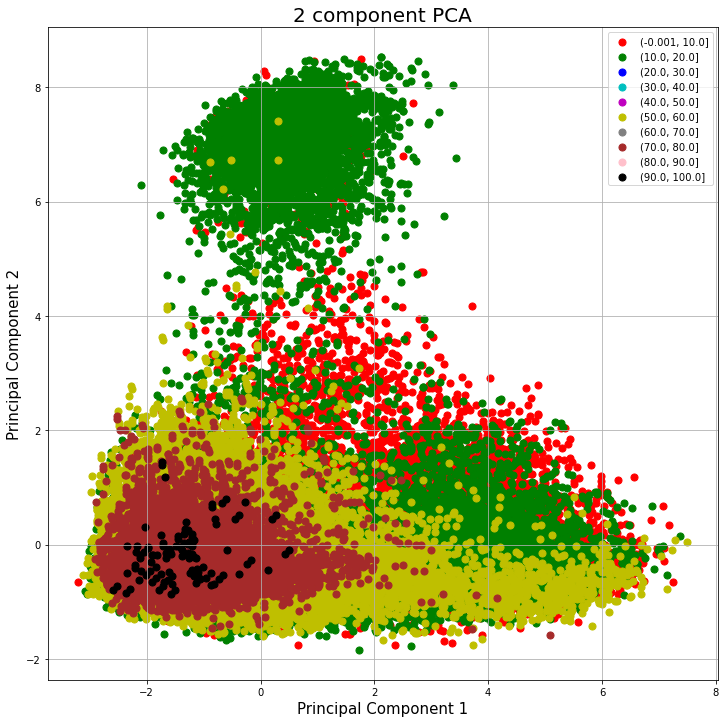

In [27]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["(-0.001, 10.0]", "(10.0, 20.0]","(20.0, 30.0] ","(30.0, 40.0]","(40.0, 50.0]","(50.0, 60.0]" ,"(60.0, 70.0] ","(70.0, 80.0]","(80.0, 90.0] ","(90.0, 100.0]"]
colors = ['r', 'g', 'b', "c", "m", "y", "gray", "brown","pink","k"]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['popularity'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [28]:
#Transform the popularity variable into ranges:
bins2 = [0,25,50,75,100]
Y2 = pd.cut(music_df["popularity"],bins2, include_lowest=True, right = True) 

In [29]:
#PCA:
finalDf2 = pd.concat([principalDf, Y2], axis = 1)
finalDf2.popularity = finalDf2.popularity.apply(str)# change buckets to string for PCA plot to work
finalDf.head()

,principal component 1,principal component 2,popularity
0,-1.041859,0.190436,"(-0.001, 10.0]"
1,-1.316615,-0.358412,"(-0.001, 10.0]"
2,1.456684,-0.321205,"(-0.001, 10.0]"
3,1.684552,-0.499234,"(-0.001, 10.0]"
4,2.578971,0.016420,"(-0.001, 10.0]"


In [30]:
Y2.value_counts()

(25.0, 50.0]      107246
(50.0, 75.0]       76646
(-0.001, 25.0]     45877
(75.0, 100.0]       2956
Name: popularity, dtype: int64

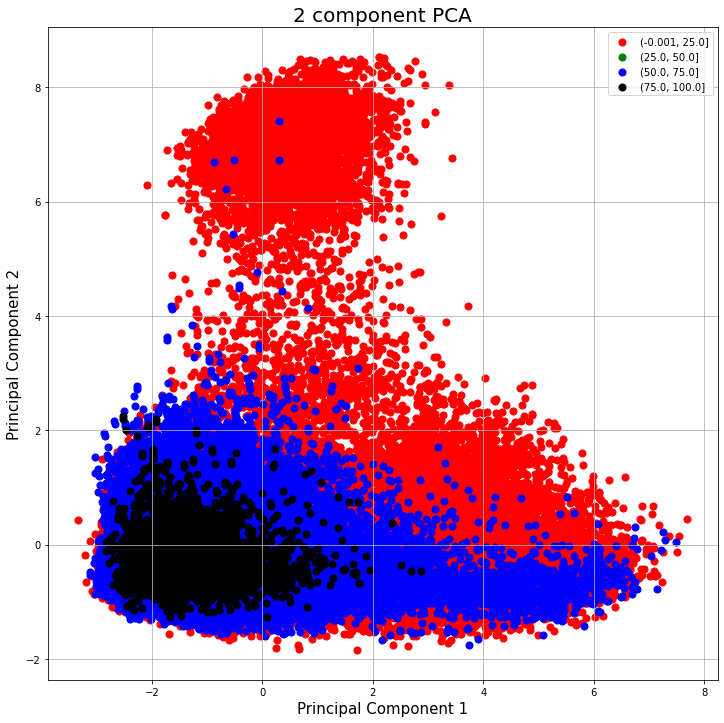

In [31]:
fig2 = plt.figure(figsize = (12,12))
ax2 = fig2.add_subplot(1,1,1) 
ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_title('2 component PCA', fontsize = 20)
targets2 = ["(-0.001, 25.0]", "(25.0, 50.0] ","(50.0, 75.0]","(75.0, 100.0]"]
colors2 = ['r', 'g', 'b', "k"]
for target, color in zip(targets2,colors2):
    indicesToKeep2 = finalDf2['popularity'] == target
    ax2.scatter(finalDf2.loc[indicesToKeep2, 'principal component 1']
               , finalDf2.loc[indicesToKeep2, 'principal component 2']
               , c = color
               , s = 50)
ax2.legend(targets2)
ax2.grid()

In [32]:
#Transform the popularity variable into ranges:
Y3 = pd.qcut(music_df["popularity"],q=4) 

In [33]:
#PCA:
principalDf3 = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf3 = pd.concat([principalDf3, Y3], axis = 1)
finalDf3.popularity = finalDf3.popularity.apply(str)# change buckets to string for PCA plot to work
finalDf3.head()

,principal component 1,principal component 2,popularity
0,-1.041859,0.190436,"(-0.001, 29.0]"
1,-1.316615,-0.358412,"(-0.001, 29.0]"
2,1.456684,-0.321205,"(-0.001, 29.0]"
3,1.684552,-0.499234,"(-0.001, 29.0]"
4,2.578971,0.016420,"(-0.001, 29.0]"


In [34]:
#look at the size of the new (equally distributed) bins
Y3.value_counts()

(43.0, 55.0]      60346
(-0.001, 29.0]    60339
(29.0, 43.0]      58304
(55.0, 100.0]     53736
Name: popularity, dtype: int64

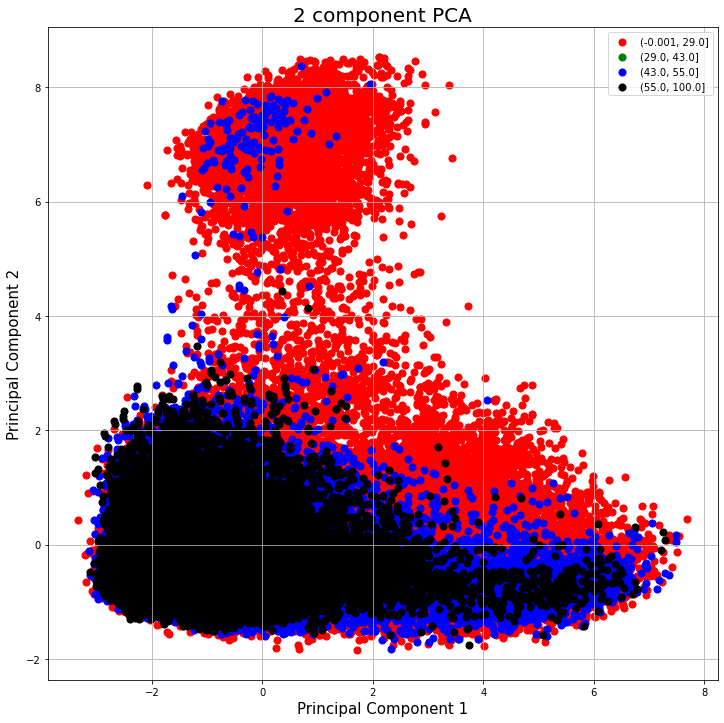

In [35]:
fig3 = plt.figure(figsize = (12,12))
ax3 = fig3.add_subplot(1,1,1) 
ax3.set_xlabel('Principal Component 1', fontsize = 15)
ax3.set_ylabel('Principal Component 2', fontsize = 15)
ax3.set_title('2 component PCA', fontsize = 20)
targets3 = ["(-0.001, 29.0]", "(29.0, 43.0] ","(43.0, 55.0]","(55.0, 100.0]"]
colors3 = ['r', 'g', 'b', "k"]
for target, color in zip(targets3,colors3):
    indicesToKeep3 = finalDf3['popularity'] == target
    ax3.scatter(finalDf3.loc[indicesToKeep3, 'principal component 1']
               , finalDf3.loc[indicesToKeep3, 'principal component 2']
               , c = color
               , s = 50)
ax3.legend(targets3)
ax3.grid()

# Model:

## 1. Multilayer perceptron

https://www.kaggle.com/sebastienmurphy/mlp-regressor-on-movie-dataset


In [36]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.neural_network import MLPRegressor

In [37]:
X, y = music_df.drop(["popularity"],1) , music_df["popularity"]

### Split data into training and test set:

In [44]:
X_tr, X_t, y_tr, y_t = train_test_split(X, y, 
                                        test_size=0.2, 
                                        random_state=0)

In [49]:
# Export to csv

X_tr.to_csv("data/X_tr.csv")
X_t.to_csv("data/X_t.csv")
y_tr.to_csv("data/y_tr.csv")
y_t.to_csv("data/y_t.csv")

### Transform the data: 

Options:
a) Standardize: For better performance of the algorithms and PCA standardize the data (mean = 0, variance = 1)
b) rescale the data into (-1,1)

a) Standardize:

In [51]:
scaling = StandardScaler().fit(X_tr)
X_tr = scaling.transform(X_tr)
X_t = scaling.transform(X_t)

Scaling:

In [52]:
# scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_tr)
# X_tr = scaling.transform(X_tr)
# X_t = scaling.transform(X_t)

Model:

Define MLP function:
- Solver = adam: for large datasets
- number of neurons in each layer: hidden_layer_sizes = (100,100) (2 layers which 100 nodes each)
  -> should be choosen as power of 2 (more efficient)
- activation function: activation='relu' (the rectified linear unit function, returns f(x) = max(0, x))
- shuffle=True: shuffle the data
- tol=1e-4: Tolerance for the optimization
- random_state=1: for reproducibility of results
- max_iter: maximum number of iterations (default=200)

In [53]:
MLP = MLPRegressor(hidden_layer_sizes=(32,), 
                   activation='relu', 
                   solver='adam',
                   shuffle=True,
                   tol=1e-4,
                   random_state=1,
                   max_iter=1000)

Calculate test results:

In [ ]:
cv = cross_val_score(MLP, X_tr, y_tr, cv=10)
test_score = MLP.fit(X_tr, y_tr).score(X_t, y_t)
print('CV accuracy score: %0.3f' % np.mean(cv))
print('Test accuracy score: %0.3f' % (test_score))

C:\Users\93cha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [46]:
y_t

134848    35
43959     50
135390    27
104126    13
58631     26
          ..
53098     32
61551     49
225066    56
231201    49
208653    39
Name: popularity, Length: 46545, dtype: int64